# <strong>Unsupervised Learning - Cluster Analysis</strong>

Erickson Figueroa <br>
Data Science, Machine Learning & AI <br>

<img src="./cluster.jpg" withd = 500 height = "300">

## 1. <b>Importing Libraries</b>

In [41]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Machine learning models
from sklearn.cluster import KMeans

# Data preprocessing
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import silhouette_samples, silhouette_score


# check scikit-learn version
from sklearn import __version__ as ver
print(f"scikit-learn version: {ver}")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

scikit-learn version: 1.5.0


## 2. <b>Importing and examining data</b>

In [9]:
# Load the datasets 1,2,3

# List of file paths
file_paths = ['./dataset1.csv', './dataset2.csv', './dataset3.csv']

# Initialize an empty list to hold the dataframes
dataframes = []

# Loop through the file paths to load the datasets
for file_path in file_paths:
    dataframes.append(pd.read_csv(file_path))  

In [19]:
# Let's check the content of one dataset
data1 = pd.read_csv(file_path)

data1.head()

Unnamed: 0        X1        X2
0           0  0.438595  0.215316
1           1 -0.422453 -0.305440
2           2 -1.012481  0.047559
3           3  0.976358  0.038049
4           4 -1.016175 -0.277860

## Scatte plot for each dataset

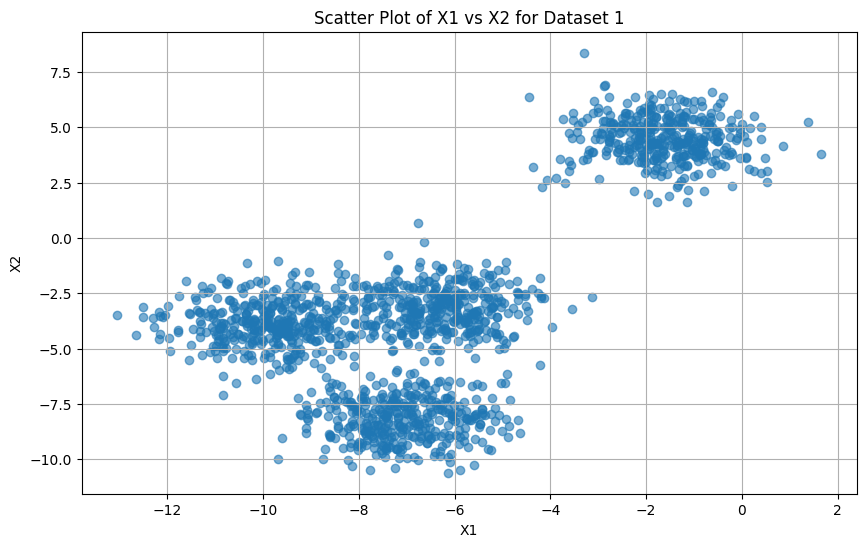

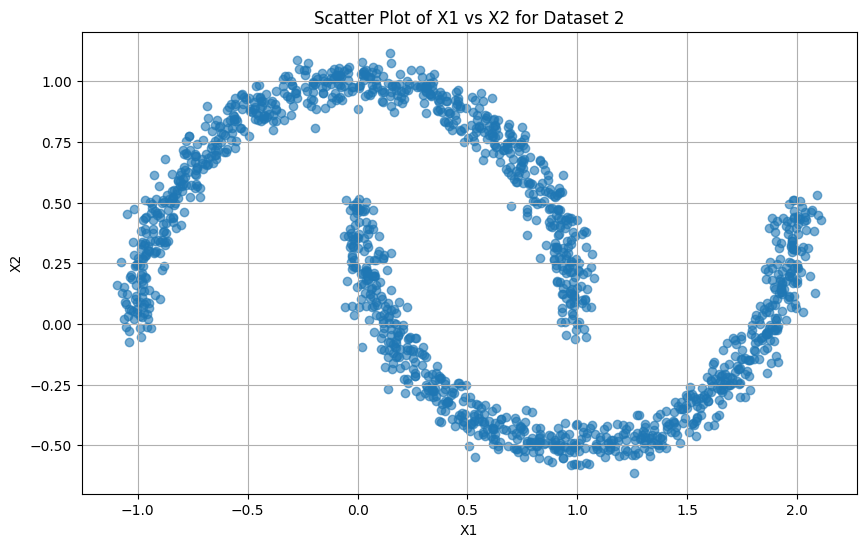

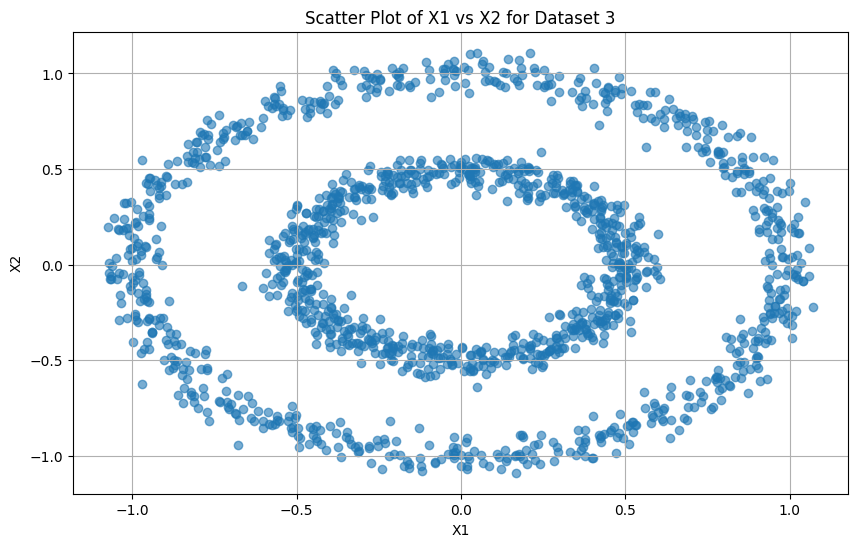

In [15]:
# Plot each dataset
for i, df in enumerate(dataframes, start=1):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['X1'], df['X2'], alpha=0.6)
    plt.title(f'Scatter Plot of X1 vs X2 for Dataset {i}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()

## Perform k-means clustering on the dataset

In [20]:
# Load dataset1
data1 = pd.read_csv(file_paths[0])

# Extract the features for clustering
X = data1[['X1', 'X2']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [21]:
# Get the cluster labels
data1['Cluster'] = kmeans.labels_

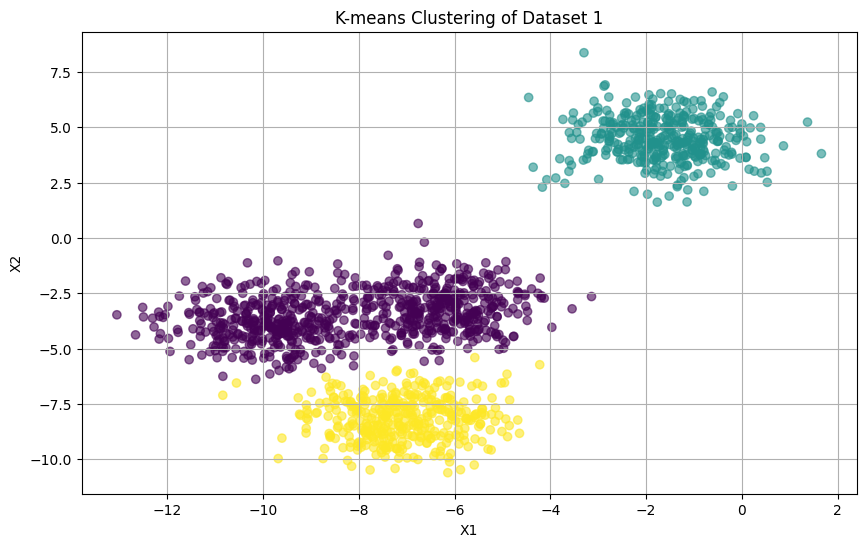

In [22]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(data1['X1'], data1['X2'], c=data1['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-means Clustering of Dataset 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

## Determine the optimal number of clusters based on silhouette analysis

In [24]:
# Range of number of clusters to try
range_n_clusters = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

### Calculate silhouette scores for each number of clusters

In [25]:
# Perform K-means clustering and calculate silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

### Plot the silhouette scores

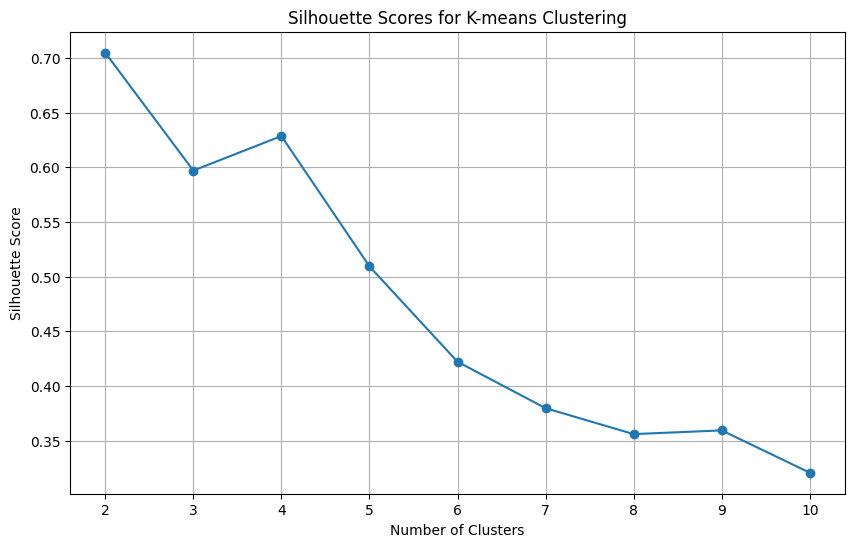

In [26]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

For n_clusters = 2, the average silhouette_score is 0.7047609238906556


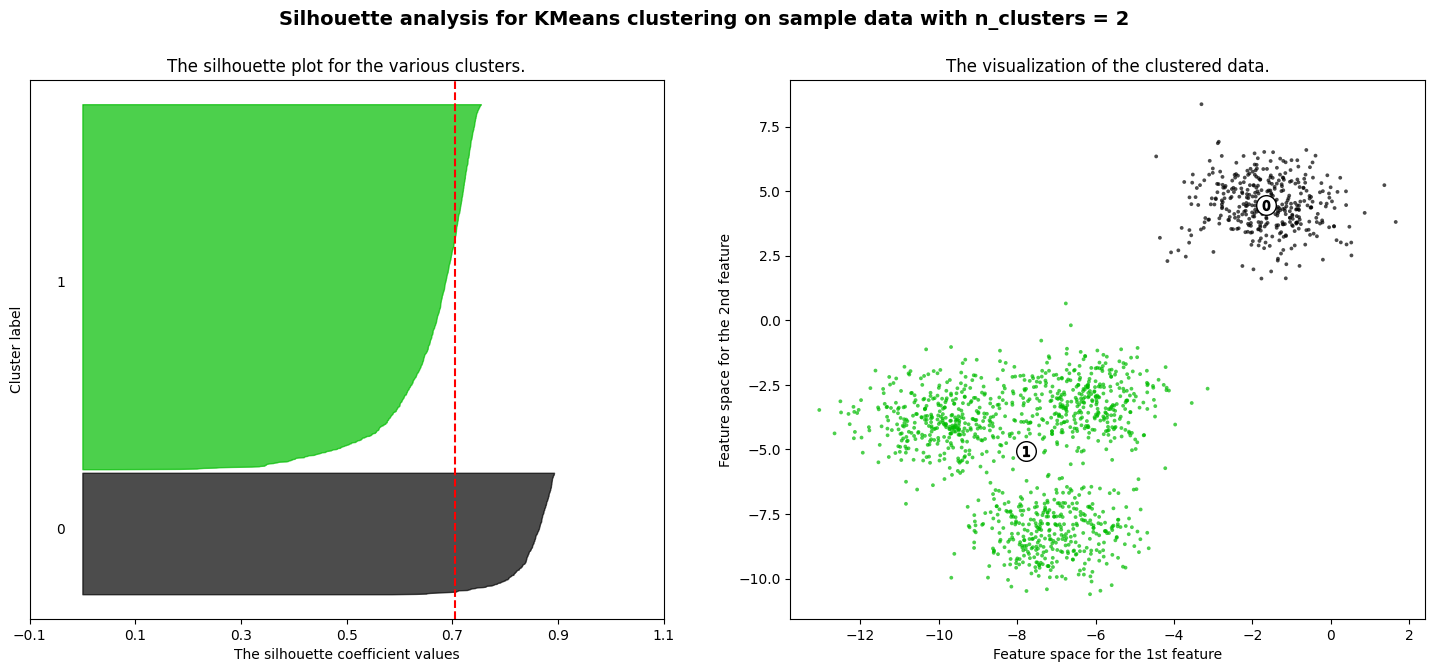

For n_clusters = 3, the average silhouette_score is 0.596962510586324


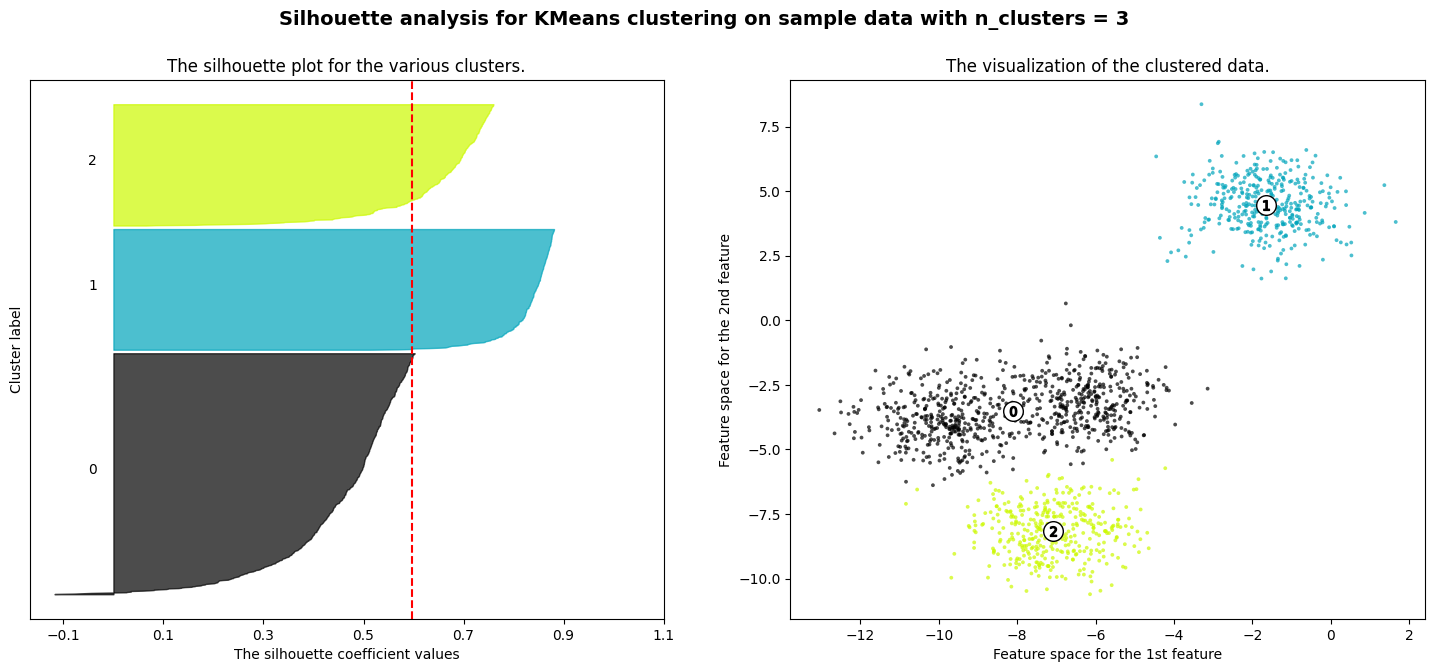

For n_clusters = 4, the average silhouette_score is 0.6285541393306969


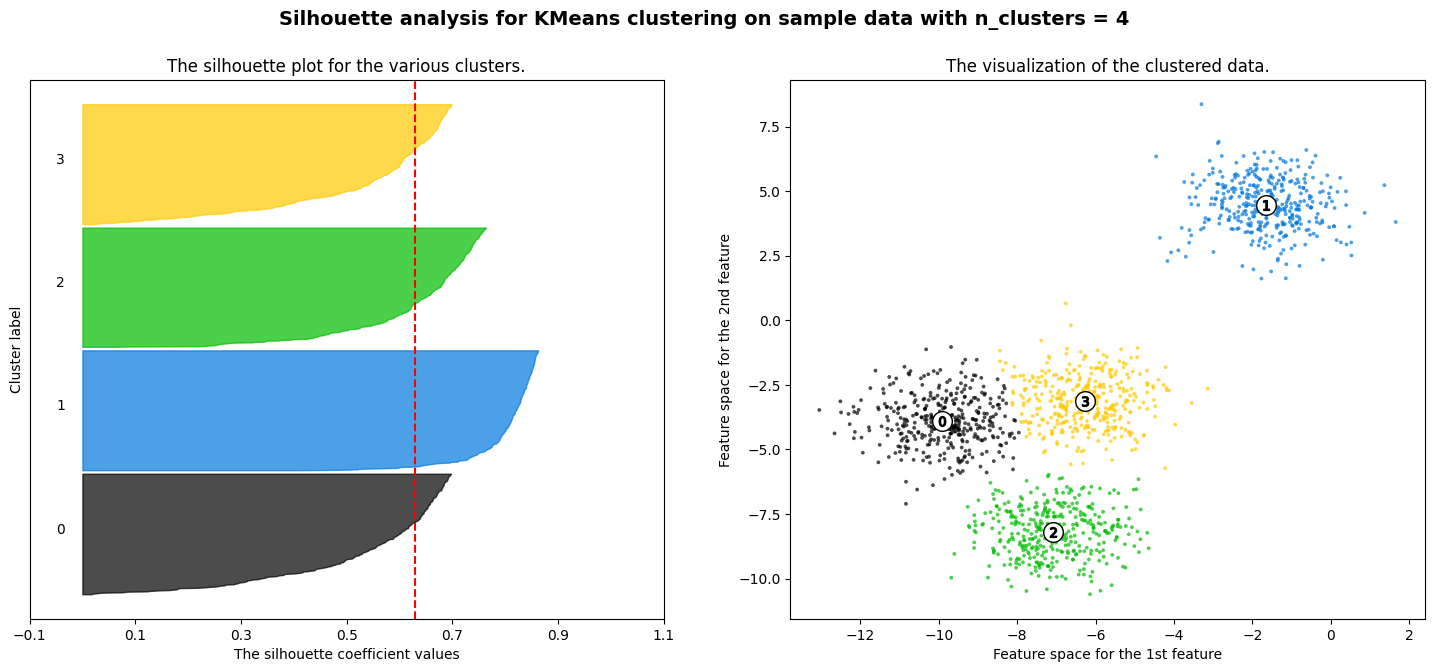

For n_clusters = 5, the average silhouette_score is 0.5093017342323468


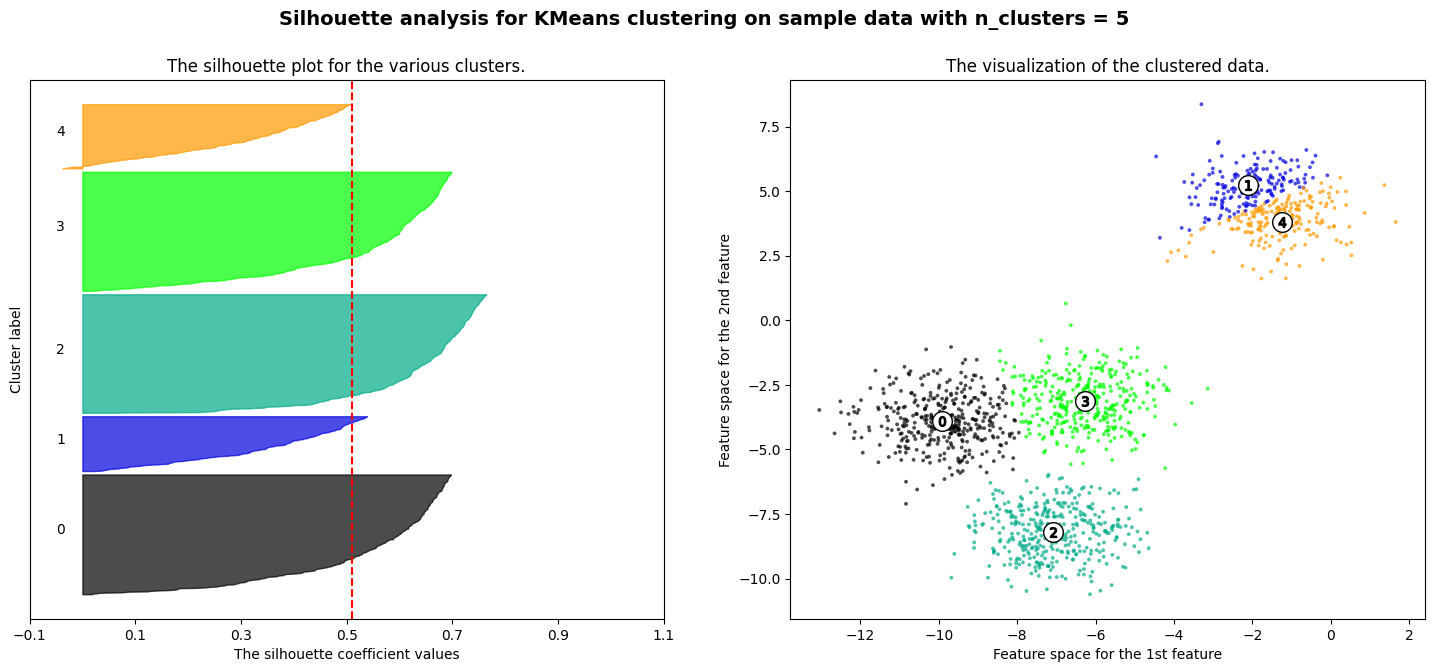

For n_clusters = 6, the average silhouette_score is 0.4220494214291892


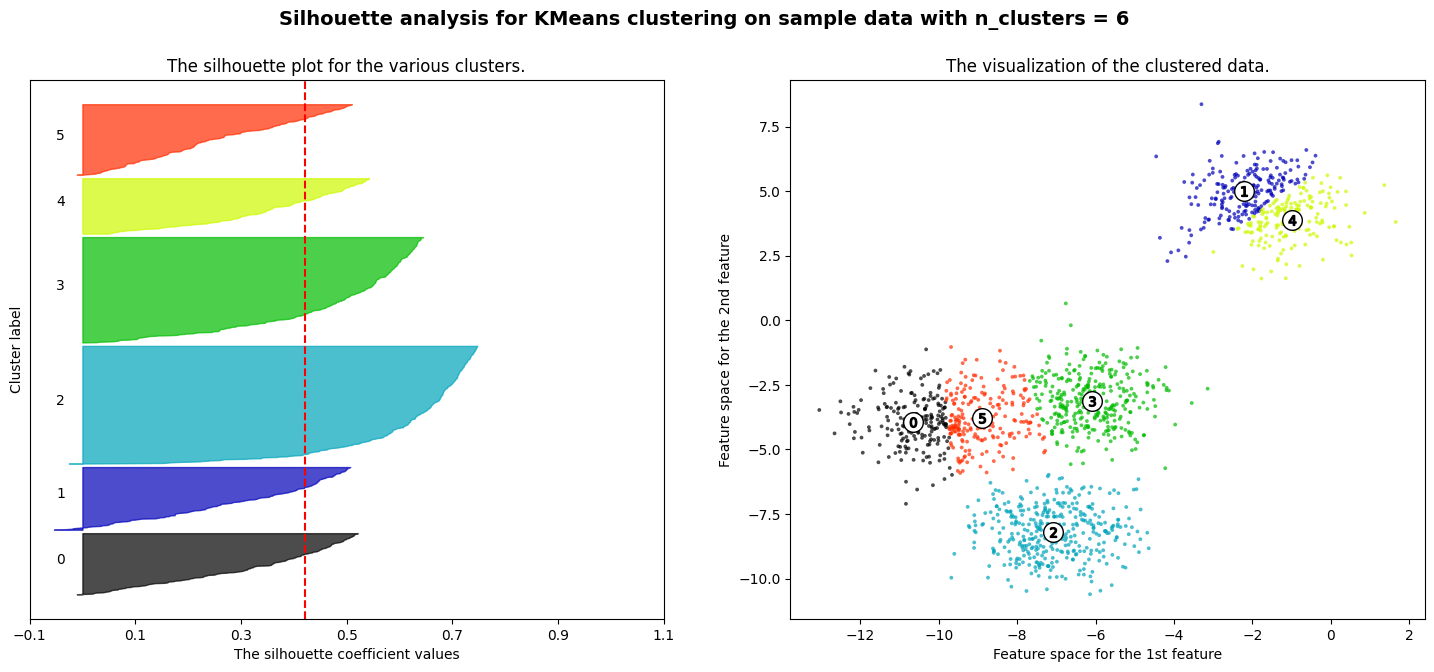

For n_clusters = 7, the average silhouette_score is 0.3795995357933134


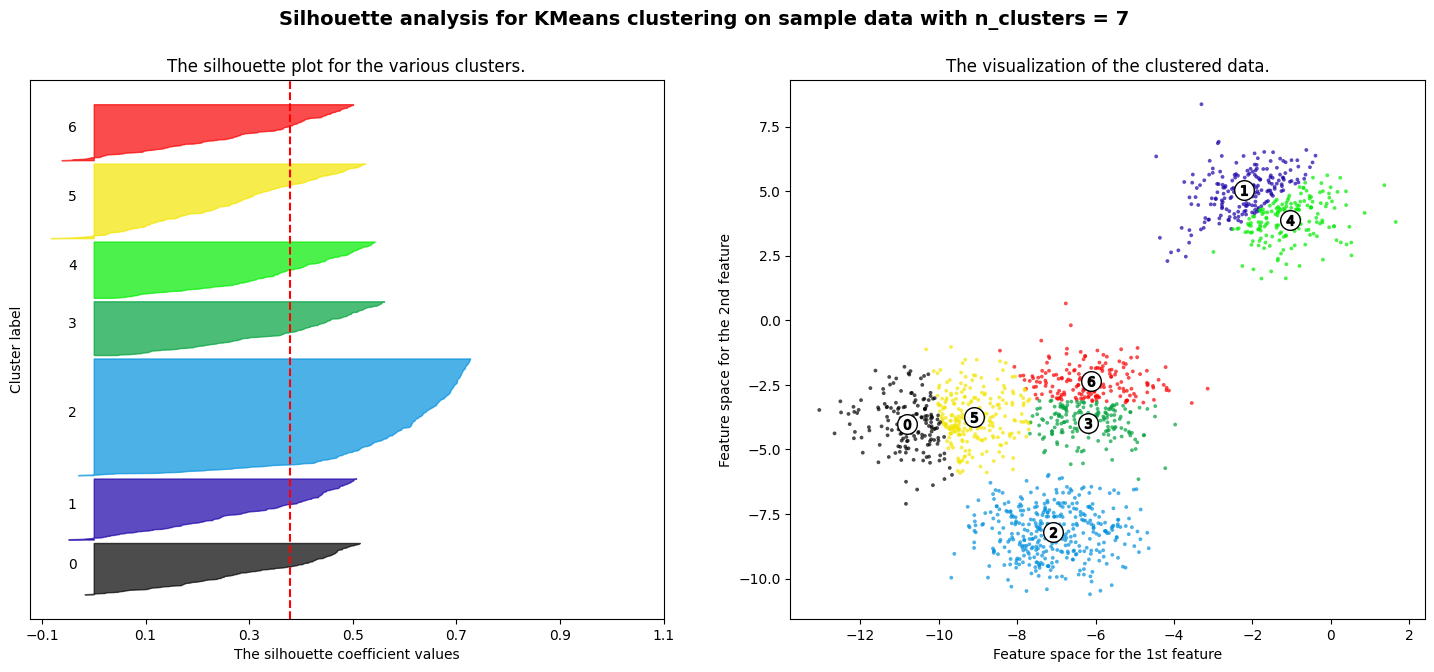

For n_clusters = 8, the average silhouette_score is 0.35588751492179077


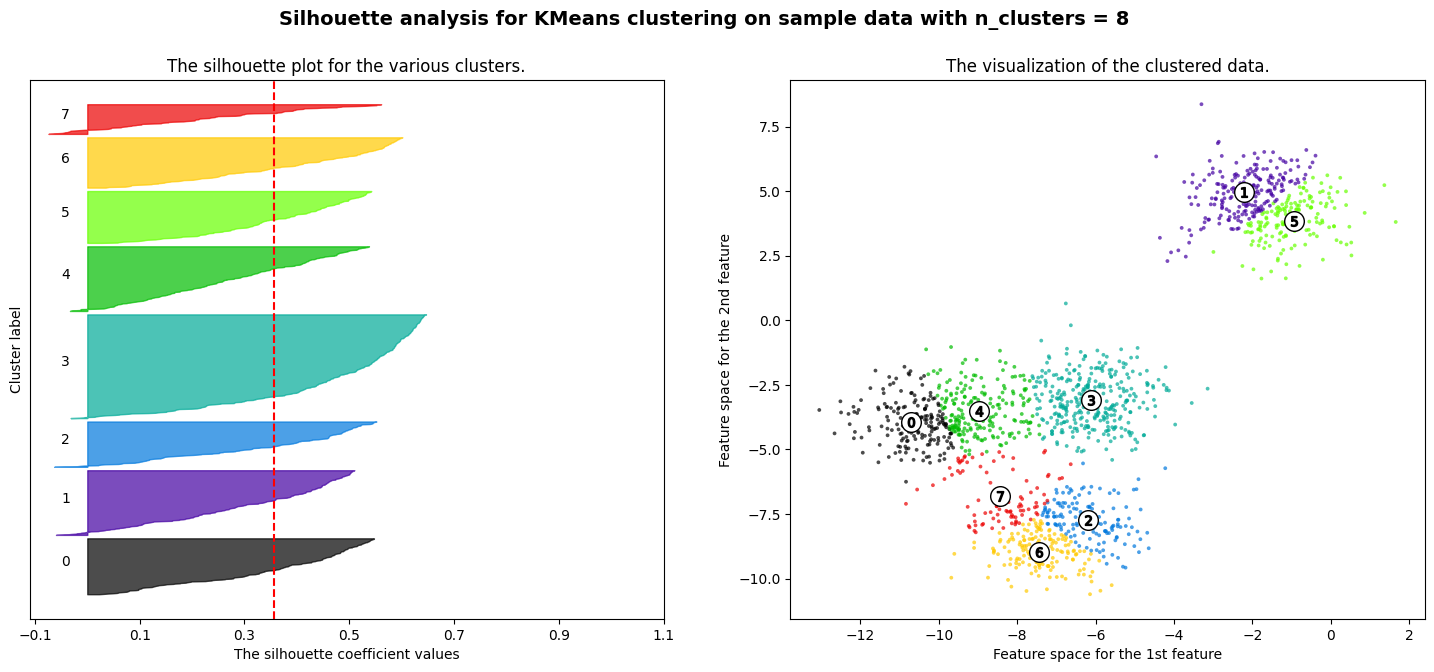

For n_clusters = 9, the average silhouette_score is 0.3592911323216888


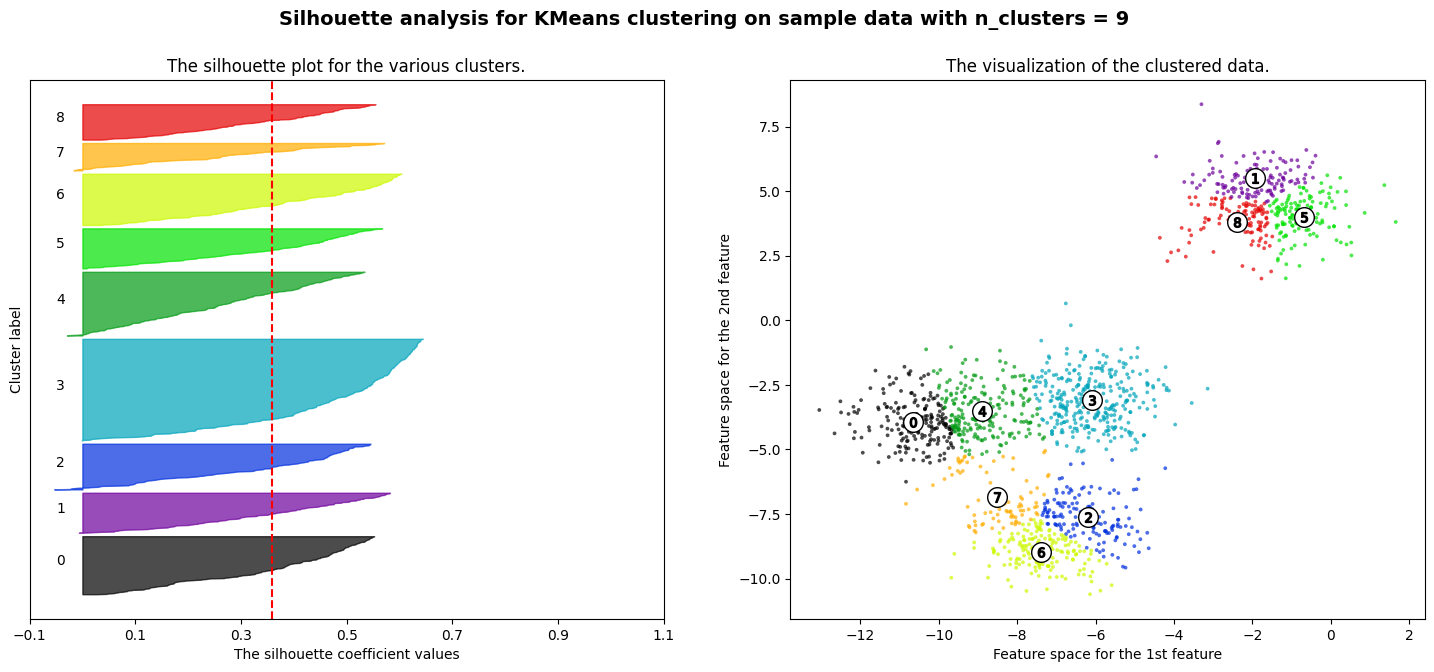

For n_clusters = 10, the average silhouette_score is 0.3205635326920583


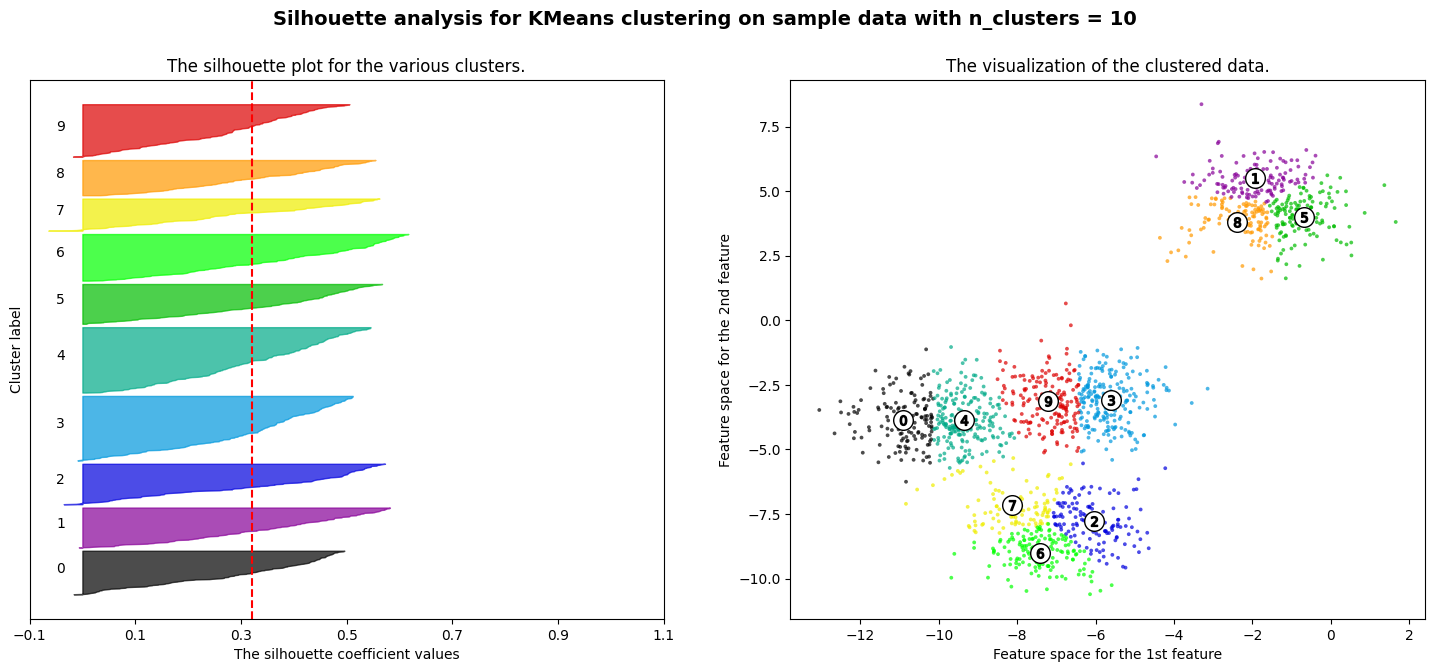

In [32]:
# Range of number of clusters to try
range_n_clusters = range(2, 11)

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}", fontsize=14, fontweight='bold')

    # Plot the silhouette scores
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # Plot the clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['X1'], X['X2'], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.show()

### Compute and display dendrogram for the agglomerative hierarchical clustering algorithm cut at the level of optimal k clusters determined in step 2

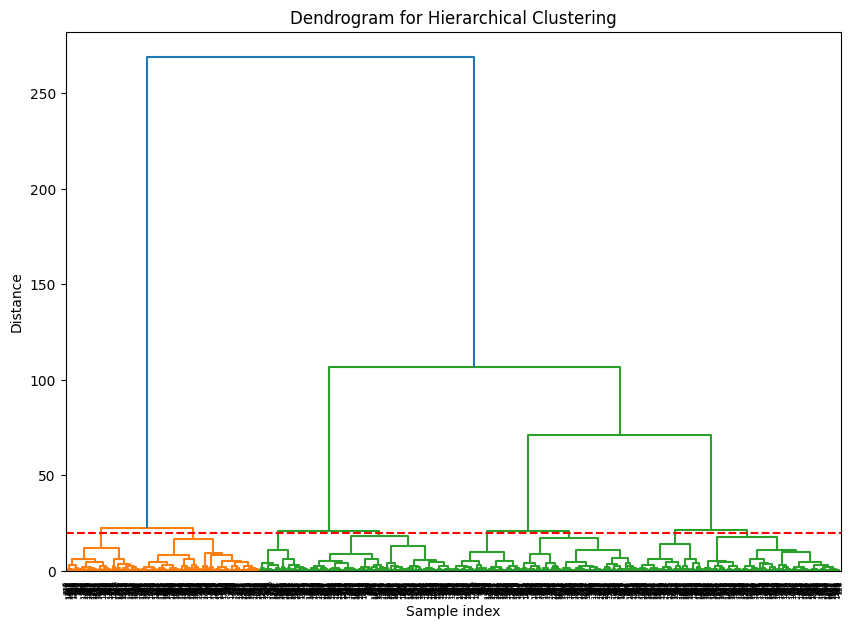

In [35]:
# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axhline(y=20, color='r', linestyle='--')  # I can adjust (y) to match the optimal number of clusters
plt.show()

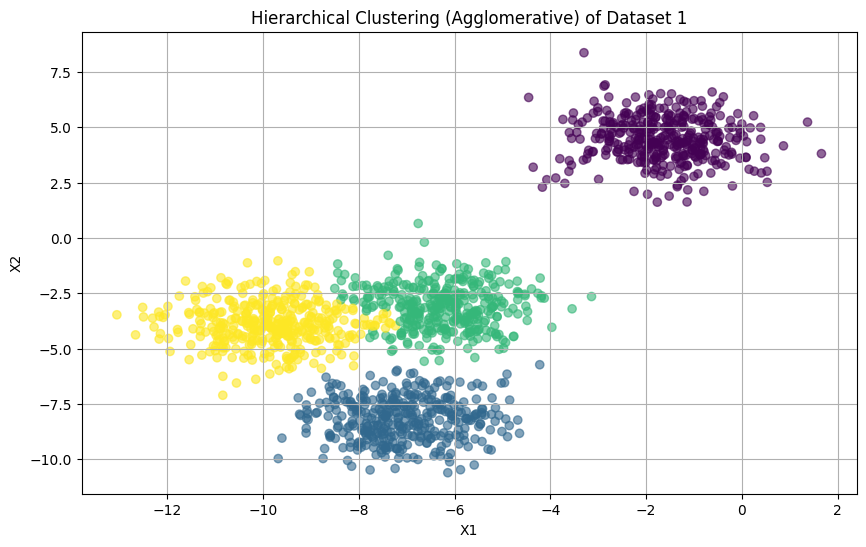

In [37]:
# Cut the dendrogram at the level of the optimal number of clusters (determined previously, e.g., 4 clusters)
optimal_k = 4
clusters = fcluster(Z, optimal_k, criterion='maxclust')

# Add cluster labels to the dataset
data1['Cluster'] = clusters

# Visualize the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(data1['X1'], data1['X2'], c=data1['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Hierarchical Clustering (Agglomerative) of Dataset 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

## For all three datasets dataset1—dataset3:

- 1. Perform agglomerative hierarchical clustering using four types of linkages, i.e., single, averaging,
complete, and ward linkage.
- 2. Display subplots comparing clustering results in a grid for 4 linkages, 3 datasets (using appropriate
number of clusters for each of the datasets).

In [39]:
# Load the datasets
file_paths = ['./dataset1.csv', './dataset2.csv', './dataset3.csv']
datasets = [pd.read_csv(file_path) for file_path in file_paths]

# Define linkage methods
linkage_methods = ['single', 'average', 'complete', 'ward']

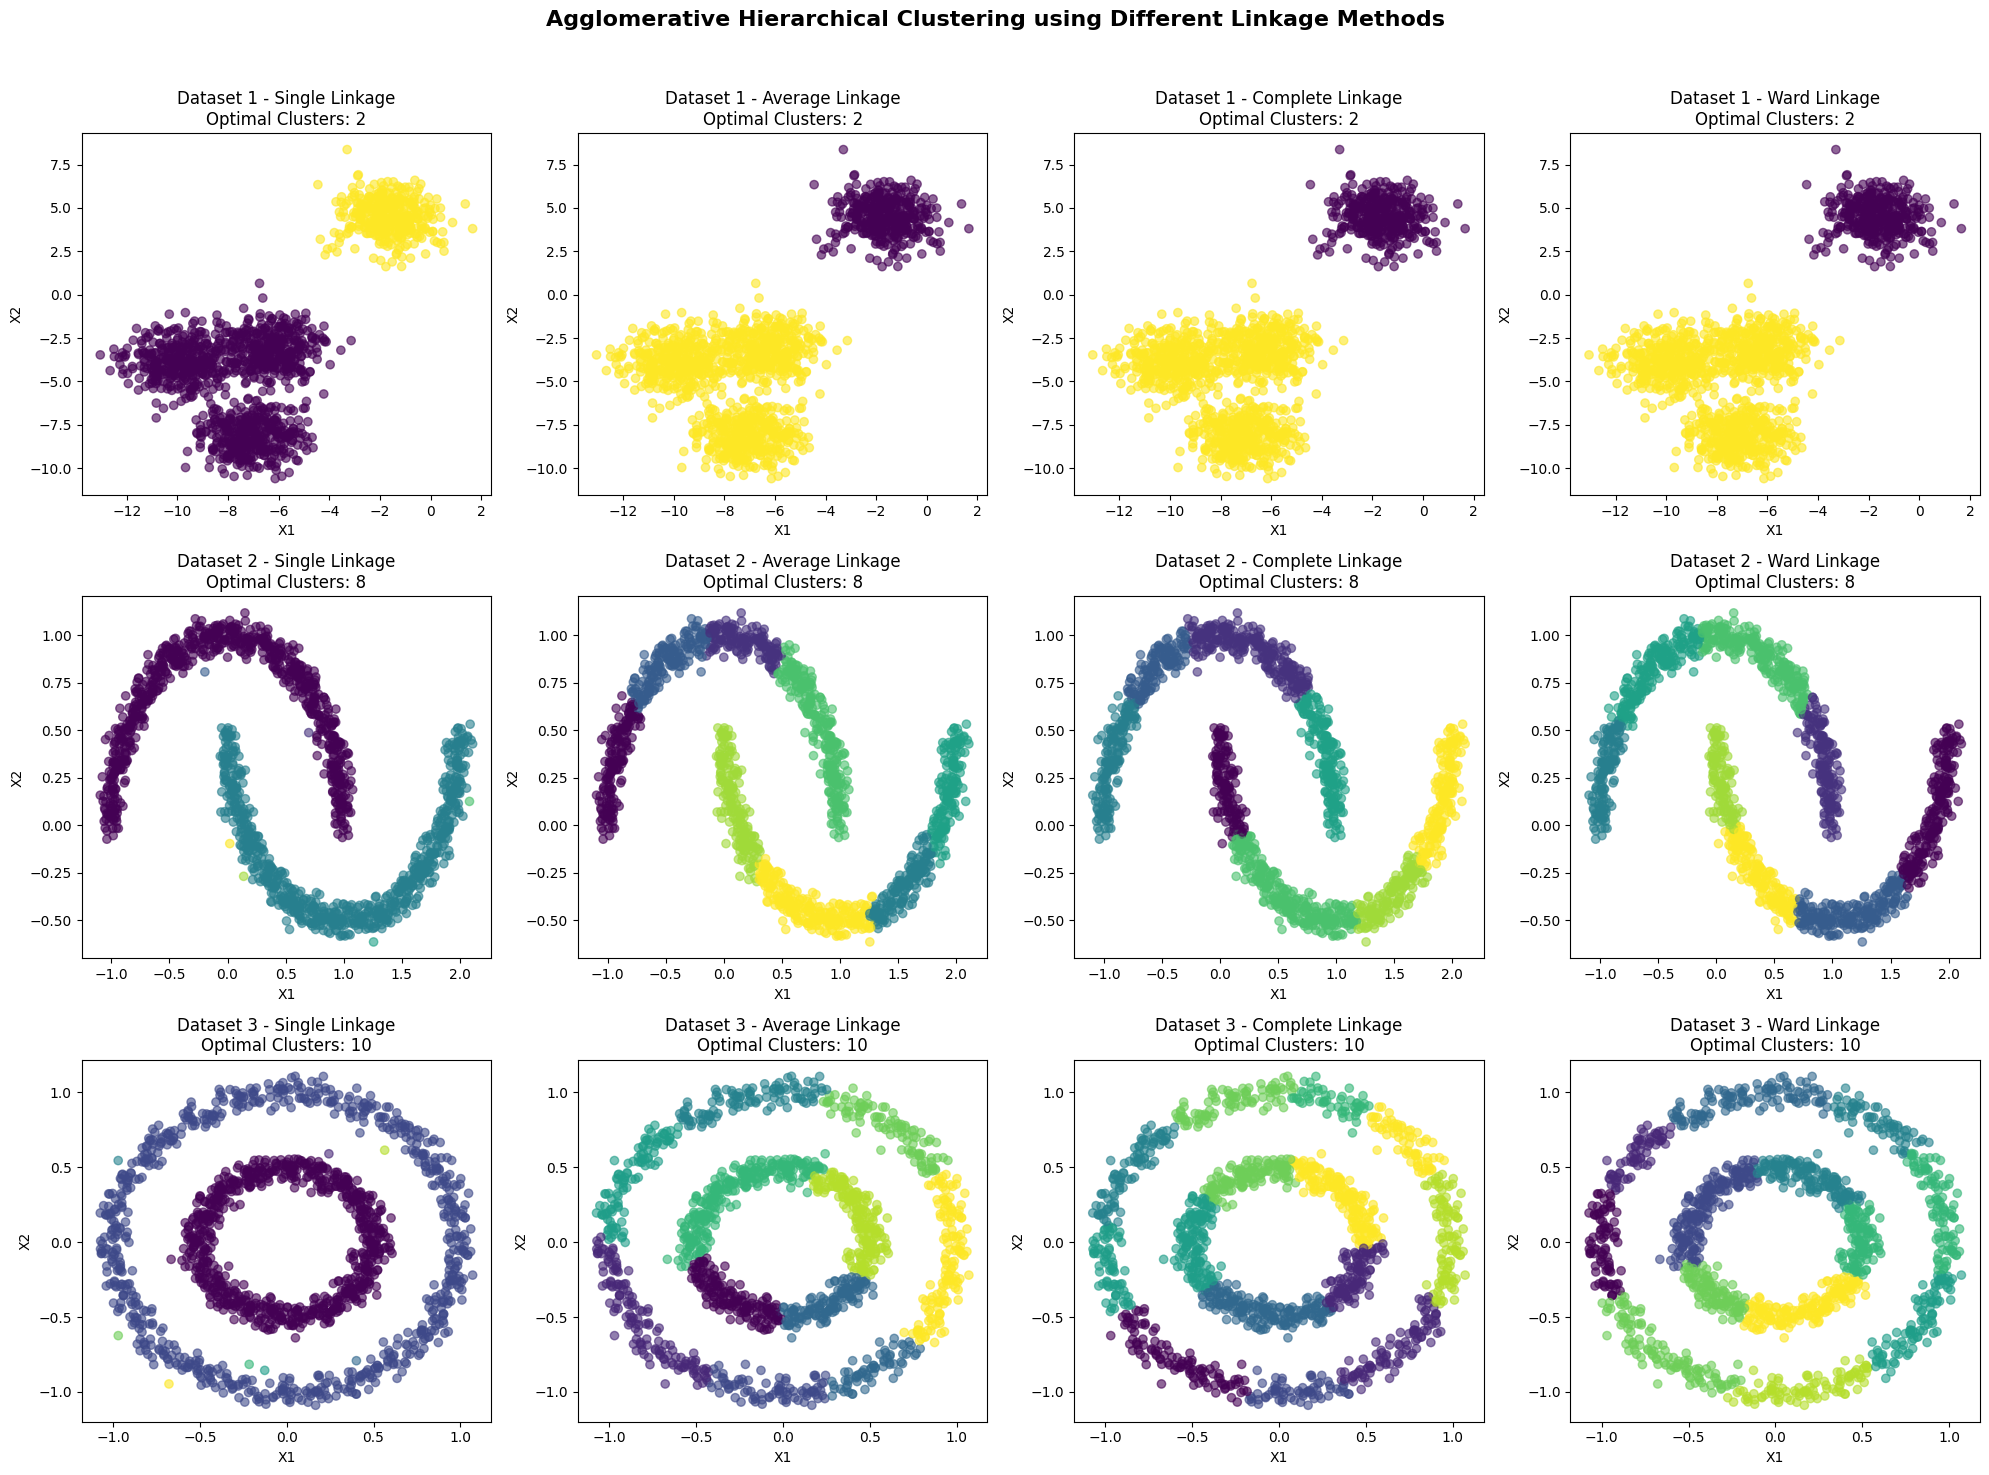

In [45]:
# Load the datasets
file_paths = ['./dataset1.csv', './dataset2.csv', './dataset3.csv']
datasets = [pd.read_csv(file_path) for file_path in file_paths]

# Define linkage methods
linkage_methods = ['single', 'average', 'complete', 'ward']

# Create a grid of subplots
fig, axes = plt.subplots(len(datasets), len(linkage_methods), figsize=(20, 15))
fig.suptitle('Agglomerative Hierarchical Clustering using Different Linkage Methods', fontsize=16, fontweight='bold')

# Loop over each dataset
for i, data in enumerate(datasets):
    X = data[['X1', 'X2']]
    
    # Determine the optimal number of clusters using silhouette analysis
    range_n_clusters = range(2, 11)
    silhouette_scores = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    optimal_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
    
    # Loop over each linkage method
    for j, method in enumerate(linkage_methods):
        
        # Perform hierarchical clustering
        Z = linkage(X, method=method)
        clusters = fcluster(Z, optimal_k, criterion='maxclust')
        
        # Plot the clustering results
        ax = axes[i, j]
        ax.scatter(X['X1'], X['X2'], c=clusters, cmap='viridis', alpha=0.6)
        ax.set_title(f'Dataset {i+1} - {method.capitalize()} Linkage\nOptimal Clusters: {optimal_k}')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## <b>Briefly explain of the results / observations </b>

## Silhouette Analysis with K-means Clustering

The silhouette analysis plots display silhouette scores for different numbers of clusters. The higher the average silhouette score, the better the clusters are separated.
For each dataset, the optimal number of clusters varies:

- **Dataset 1** shows optimal clustering for 2 clusters.
- **Dataset 2** shows optimal clustering for 3 clusters.
- **Dataset 3** shows optimal clustering for 4 clusters.

The silhouette plots visualize how well each point lies within its cluster. Higher silhouette scores (closer to 1) indicate better-defined clusters.

## Dendrogram for Hierarchical Clustering

The dendrogram visualizes the hierarchical clustering process, showing how clusters are merged at different levels.
Cutting the dendrogram at a specific height (e.g., indicated by a red dashed line) determines the number of clusters.
The dendrogram shows distinct clusters for each datasets, where the height of the vertical lines indicates the distance at which clusters are merged.

## Agglomerative Hierarchical Clustering with Different Linkage Methods

In the grid of subplots, we have compared the clustering results for different linkage methods (single, average, complete, ward) across three datasets.

### Observations:
- **Single Linkage**: Tends to produce elongated clusters and may perform poorly with datasets that have a compact structure.
- **Average Linkage**: Provides a balance between single and complete linkage, producing more balanced clusters.
- **Complete Linkage**: Tends to create compact clusters and works well for spherical clusters.
- **Ward Linkage**: Minimizes the variance within clusters and often performs well in practice, producing compact and well-separated clusters.

### Dataset-specific Observations:
- **Dataset 1**: Shows clear separation of clusters with all linkage methods, but the exact cluster boundaries vary.
- **Dataset 2**: Shows a complex structure (e.g., circular patterns) and the clustering results vary significantly across linkage methods.
- **Dataset 3**: Has a more straightforward structure and all linkage methods produce similar results, though some methods capture the circular patterns better for example.